# 6.5 Machine Learning Part 2

## This script contains the following:

1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering
4. Calcualte Descrptive Statistics

## Importing libraries and data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\Asus\Exercise 6.5'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'FBI Trafficking CLEANED.csv'))

In [5]:
df.head()

,Unnamed: 0,Year,Agency Type,State,Region,Offense,Offense Subcat,Offense Count
0,0,2013,1,25,0,0,0,6
1,1,2013,1,35,0,0,0,1
2,2,2013,1,35,0,0,1,1
3,3,2013,0,42,2,0,0,1
4,4,2013,0,42,2,0,0,3


In [6]:
df.shape

(3894, 8)

## 2. Elbow Technique

In [7]:
# Define the range of potentioal clusters
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [8]:
# create score representing rate ofvariation for given cluster option 
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\Asus\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Asus\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\Asus\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character

[-4921822963.312272,
 -1231449121.4580894,
 -548064874.4506375,
 -308858383.1440582,
 -198157523.7749434,
 -138037630.21947736,
 -101712877.77351888,
 -78170160.24236813,
 -61901384.40510202]

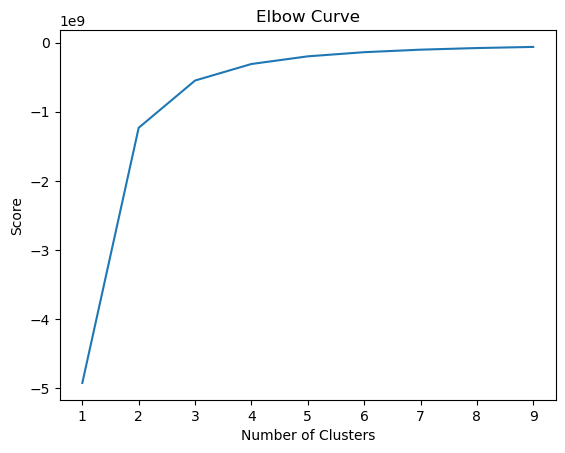

In [9]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

We can see in the elbow that in the x-axis line, it begins to clearly break at number three and begins to flatten from there. 
Therefore, according to theory, my optimal cluster count should be three.   

## 3. K-means Clustering

In [10]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [11]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [12]:
# Perform clustering using the k-means model and assign the results to new 'clusters' column
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
df.head()

,Unnamed: 0,Year,Agency Type,State,Region,Offense,Offense Subcat,Offense Count,clusters
0,0,2013,1,25,0,0,0,6,0
1,1,2013,1,35,0,0,0,1,0
2,2,2013,1,35,0,0,1,1,0
3,3,2013,0,42,2,0,0,1,0
4,4,2013,0,42,2,0,0,3,0


In [14]:
df['clusters'].value_counts()

clusters
1    1303
2    1298
0    1293
Name: count, dtype: int64

###### Scatterplots

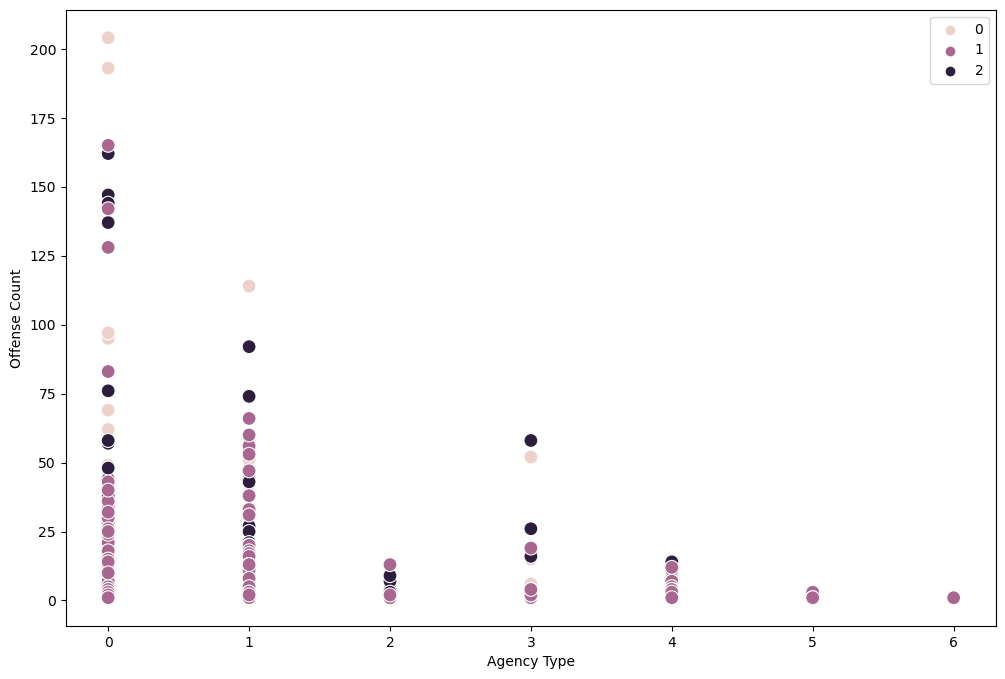

In [15]:
# Plot the clusters for Offense Count and Agency Types variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Agency Type'], y=df['Offense Count'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Agency Type')
plt.ylabel('Offense Count') 
plt.show()

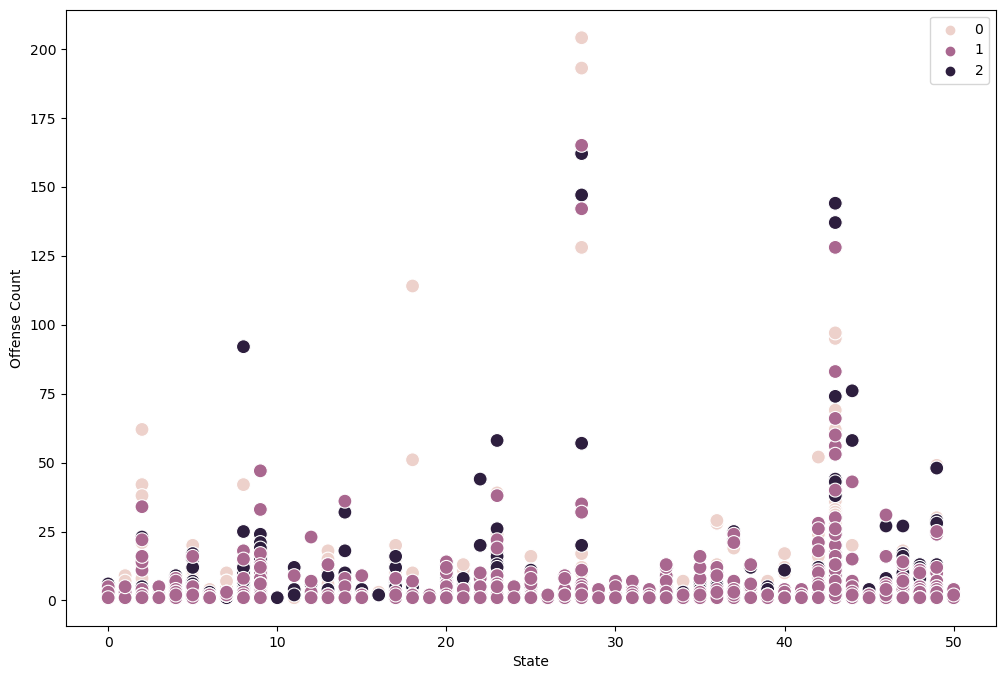

In [17]:
# Plot the clusters for Offense Count and State variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['State'], y=df['Offense Count'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('State')
plt.ylabel('Offense Count') 
plt.show()

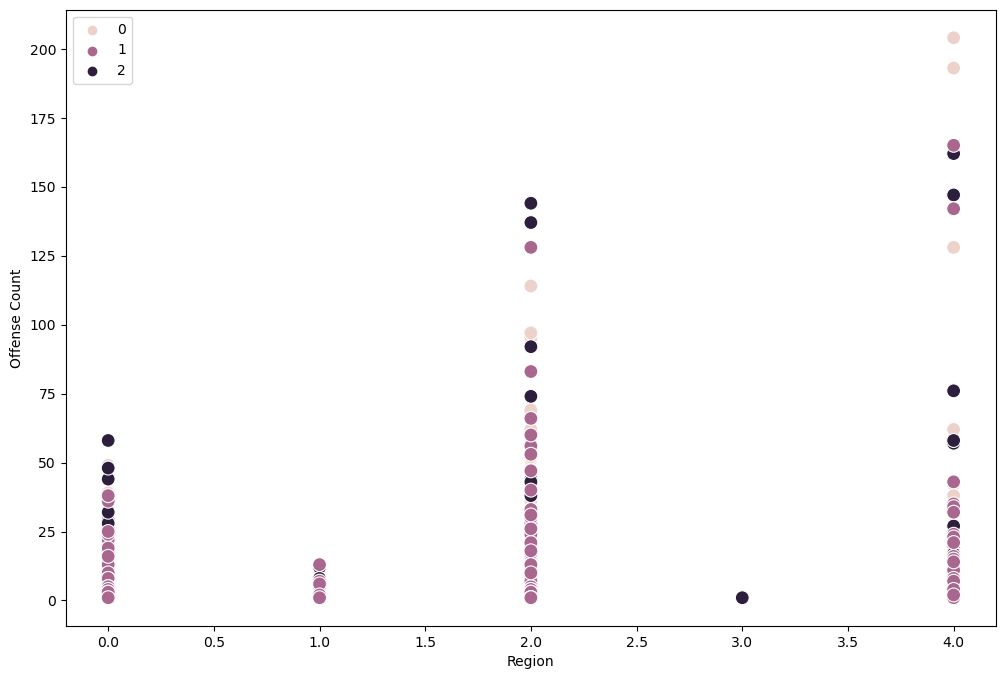

In [18]:
# Plot the clusters for Offense Types and Region variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Region'], y=df['Offense Count'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Region')
plt.ylabel('Offense Count') 
plt.show()

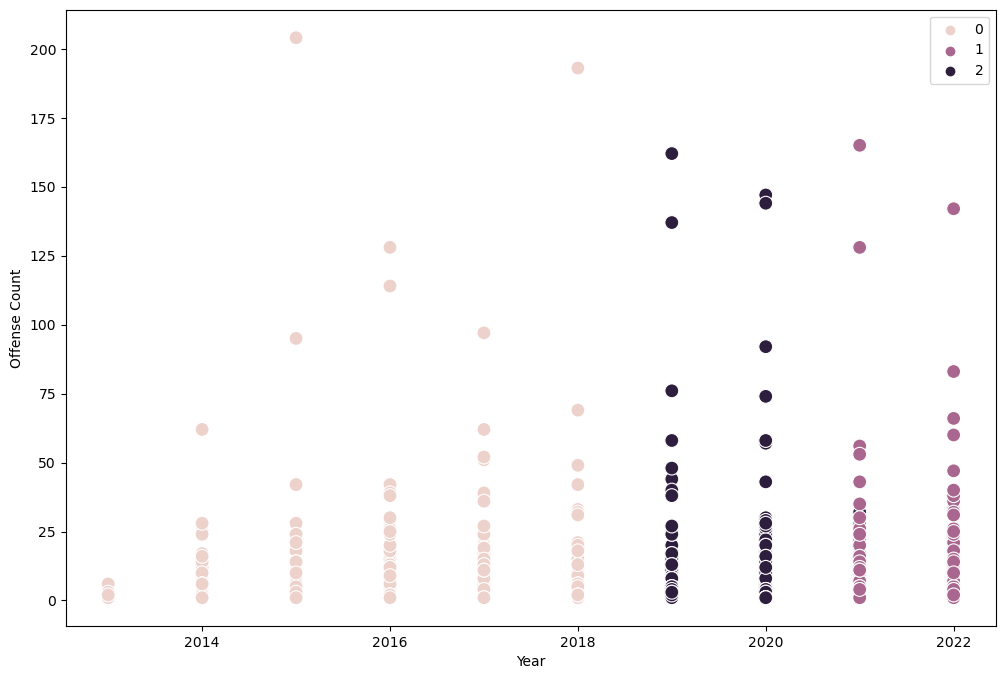

In [19]:
# Plot the clusters for Offense Types and Year variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Offense Count'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Year')
plt.ylabel('Offense Count') 
plt.show()

##### Conclusion:

According to all the data we have and viewed in tis different constellations, we can conclude that the lighter the color of the cluster, the less severe the type of offense. Conversely, the darker the color of the cluster, the more severe the offense. WE clearly see that in between 2019 and 2020 the severity of the offenses were extreme.  

### 4. Calculate descriptive statistics 

In [22]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
df.groupby('cluster').agg({'Year':['mean', 'median'], 
                         'Region':['mean', 'median'], 
                         'State':['mean', 'median'],
                           'Agency Type':['mean', 'median'],
                          'Offense Count':['mean', 'median']})

Year            Region             State         \
                    mean  median      mean median       mean median   
cluster                                                               
dark purple  2019.860555  2020.0  1.629430    2.0  27.448382   25.0   
pink         2016.764888  2017.0  1.647332    2.0  25.738592   23.0   
purple       2021.638526  2022.0  1.745203    2.0  30.415963   33.0   

            Agency Type        Offense Count         
                   mean median          mean median  
cluster                                              
dark purple    0.721880    0.0      3.701079    1.0  
pink           0.505027    0.0      4.379737    1.0  
purple         0.631619    0.0      3.504221    1.0

### Conclusions:

1. We have established that the lighter the color, the less severe the offense ahd the darker the color, the more severe the offense.
2. In 2019 and 2020 the severity of the offenses were high...much higher than 2013 through 2018. We then see a reduction in severity. This is probably due to the Covid period around the globe. 

We can clearly see a definite pattern coming to life when we look at the 4 scatterplots above. We can see which agency types see the most trafficking offenses and we can see the severity of these offenses in each state, in which region, and how often these trafficking offenses occured. We can use this data to determine wich states see the most trafficking, which agencies have the most exposure to trafficking offenses, and which regions have the bigest problems with trafficking. With these sets of data, we can build a failry good picture for law enforcement that answers the questions where, how often, and to what extent these trafficking crimes are happening. Law enforcement can, in turn, use this data to build a counter strategy to curb the number of instances and possibly even identify traffic routes according to region/state data. WE can build strong hypotheses in order to build strong cases with strong evidence showing how the problem of human trafficking can be reduced and hopefully even eliminated in the United States.    